In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [268]:
data = pd.read_csv(r"E:\Andhra_Health_Data.csv")

In [269]:
data.shape

(479688, 23)

In [270]:
new_df = data.sample( 200000,ignore_index=True)

In [271]:
new_df.columns

Index(['Sno', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [272]:
new_df.drop(columns=["Sno"],inplace=True,axis=1)

In [273]:
new_df.select_dtypes(include="object").columns

Index(['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME', 'SURGERY_CODE',
       'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME', 'PREAUTH_DATE',
       'CLAIM_DATE', 'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [274]:
cat_col = ['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
        'DISTRICT_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'Mortality Y / N',
       'SRC_REGISTRATION']

In [275]:
num_cols = ['AGE', 'PREAUTH_AMT', 'CLAIM_AMOUNT']

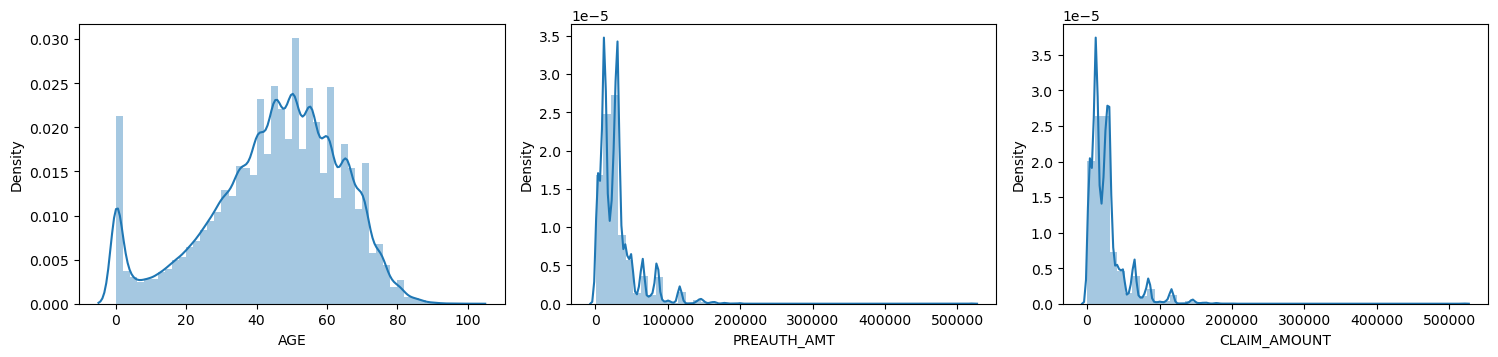

In [277]:
plt.figure(figsize=[20,10])
nrows=3
ncols=4
it=1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.distplot(new_df.loc[:,i])
    it+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='AGE'>

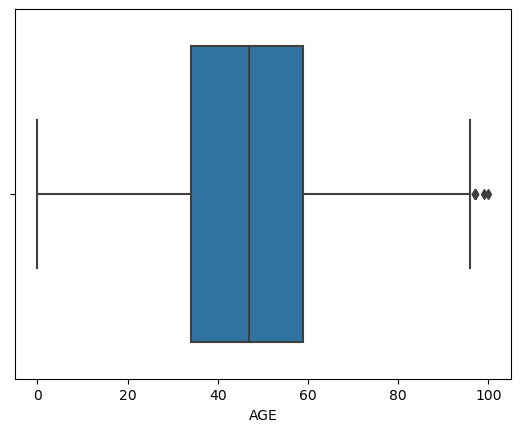

In [283]:
sns.boxplot(new_df.AGE)

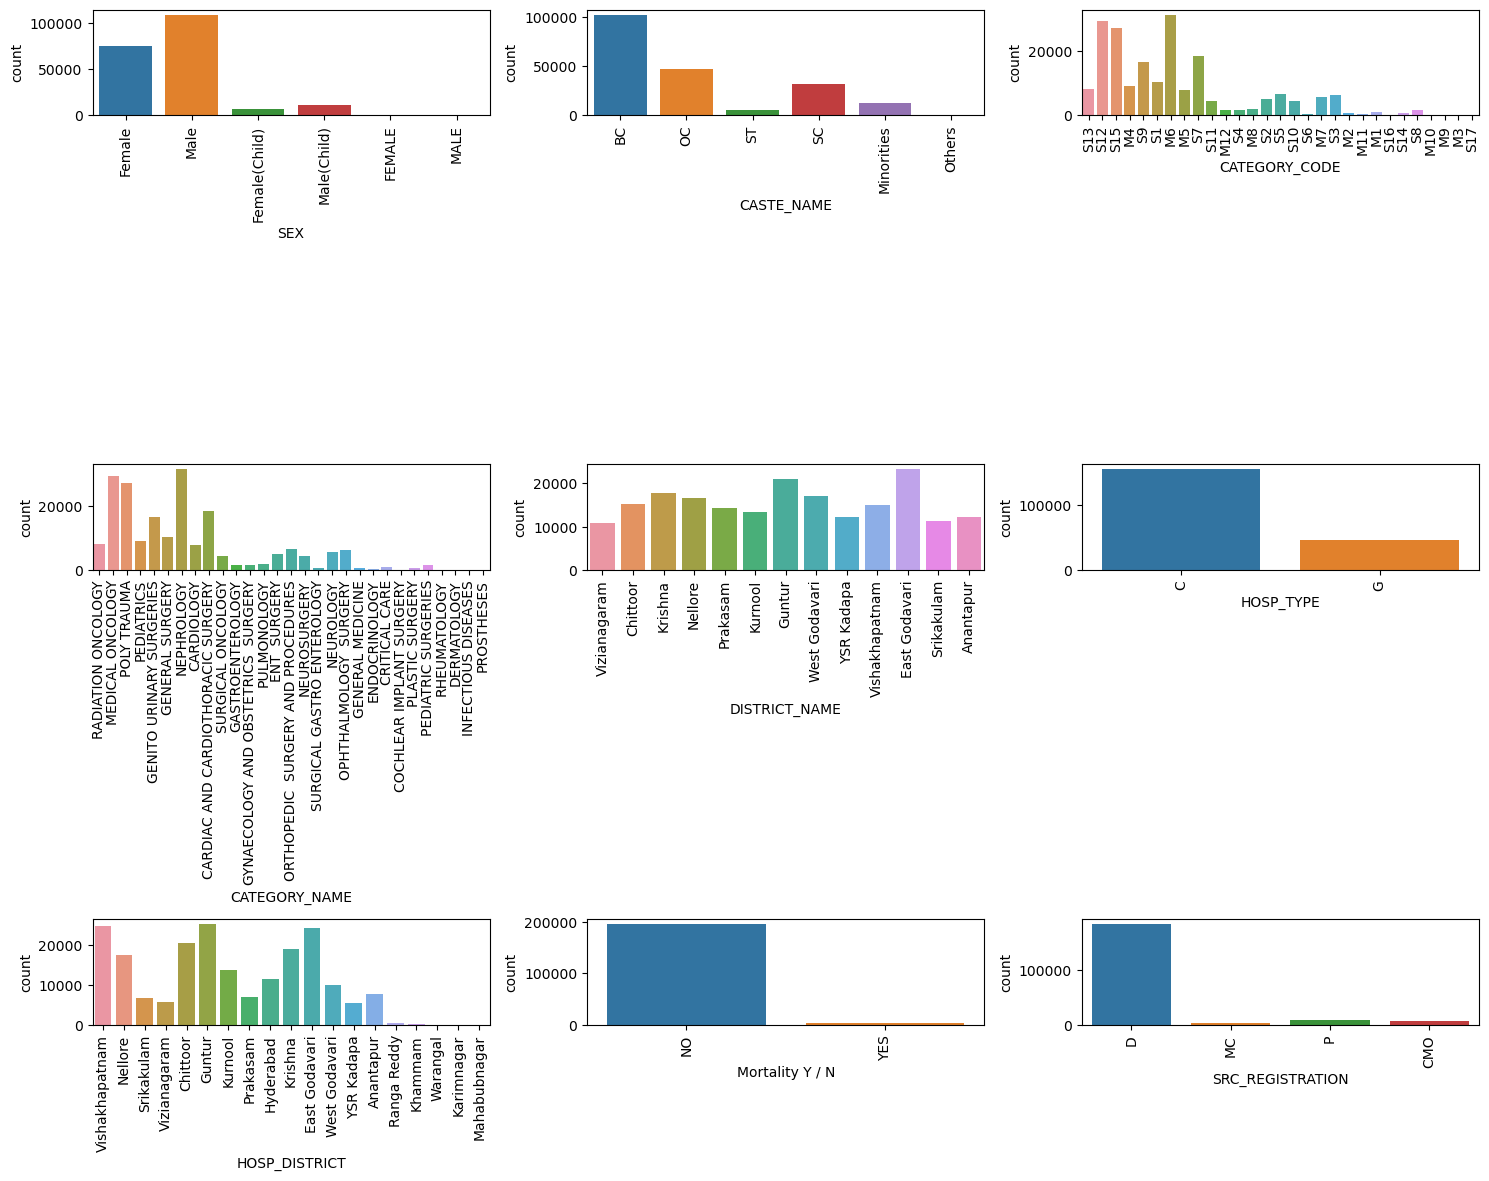

In [12]:
plt.figure(figsize=[15,15])
nrows=4
ncols=3
it=1
for i in cat_col:
    plt.subplot(nrows,ncols,it)
    sns.countplot(new_df.loc[:,i])
    plt.xticks(rotation=90)
    it+=1
    
plt.tight_layout()
plt.show()

## Bi -Variate Analysis

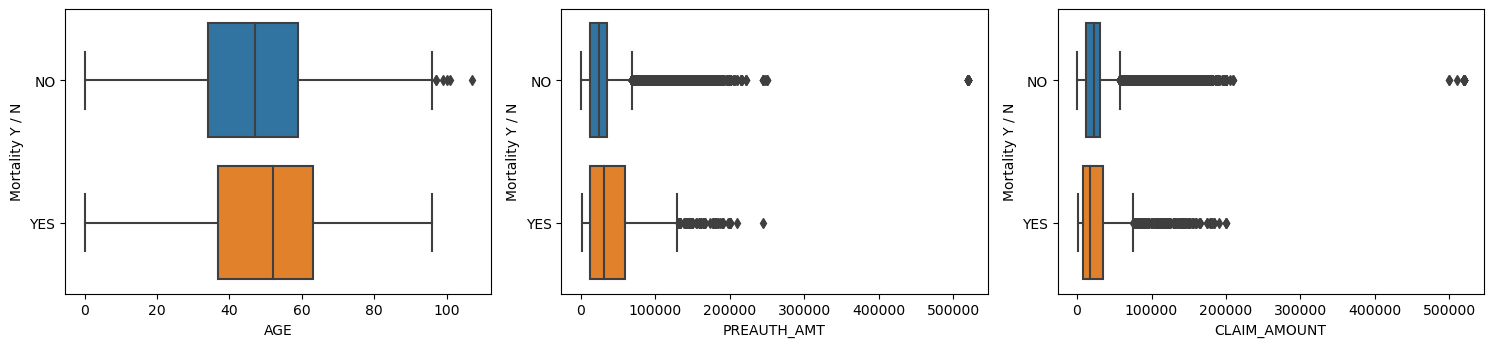

In [13]:
plt.figure(figsize=[20,10])
nrows=3
ncols=4
it=1
for i in num_cols:
    plt.subplot(nrows,ncols,it)
    sns.boxplot(x=new_df.loc[:,i],y=new_df['Mortality Y / N'])
    it+=1
    
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

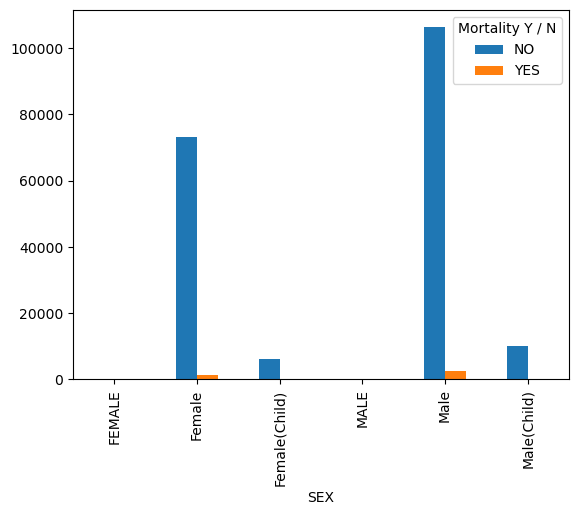

<Figure size 500x500 with 0 Axes>

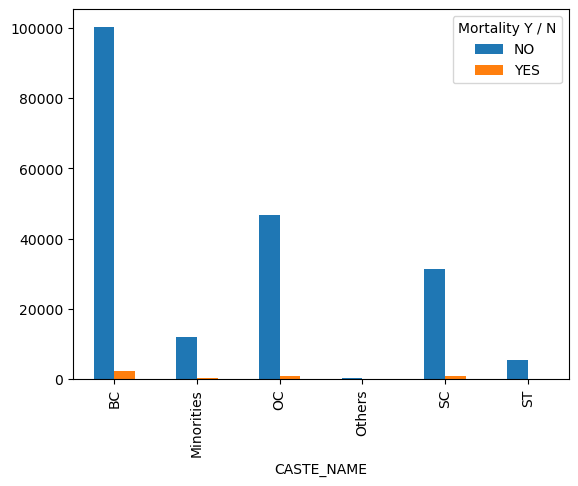

<Figure size 500x500 with 0 Axes>

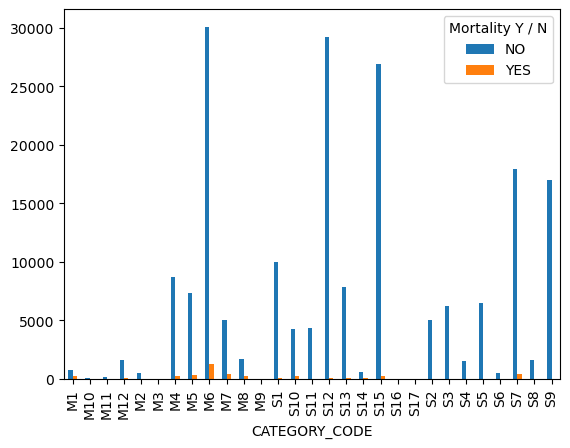

<Figure size 500x500 with 0 Axes>

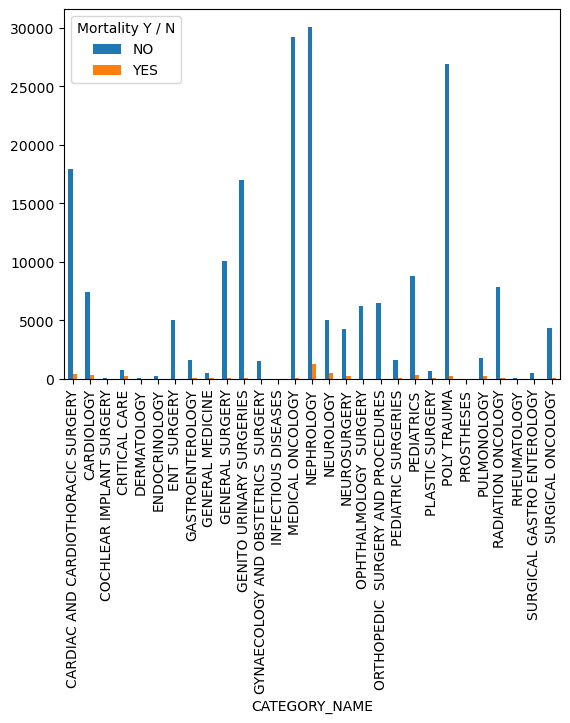

<Figure size 500x500 with 0 Axes>

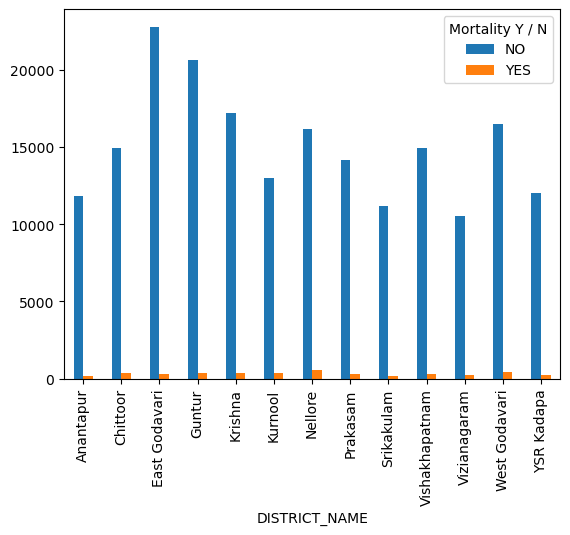

<Figure size 500x500 with 0 Axes>

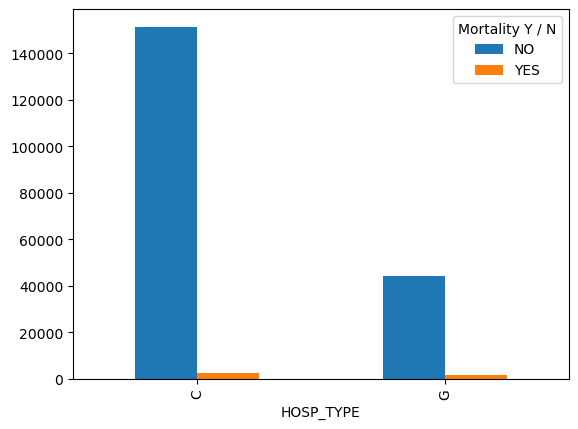

<Figure size 500x500 with 0 Axes>

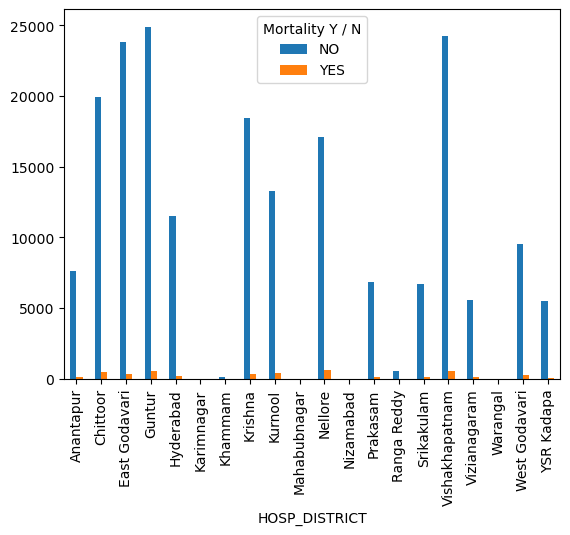

<Figure size 500x500 with 0 Axes>

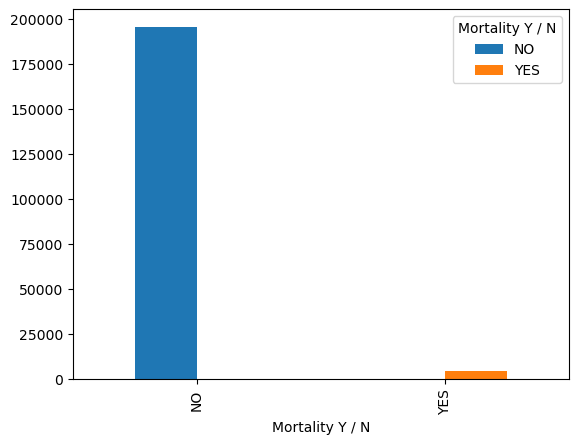

<Figure size 500x500 with 0 Axes>

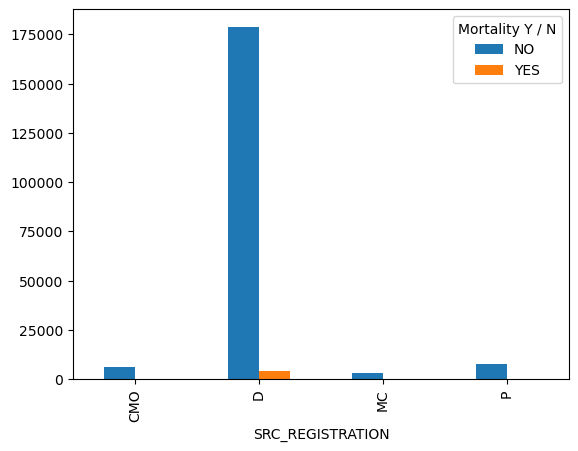

In [288]:
for i in cat_col:
    plt.figure(figsize=[5,5])
    pd.crosstab(new_df[i],new_df["Mortality Y / N"]).plot(kind="bar")
    
plt.show()

<AxesSubplot:xlabel='SRC_REGISTRATION'>

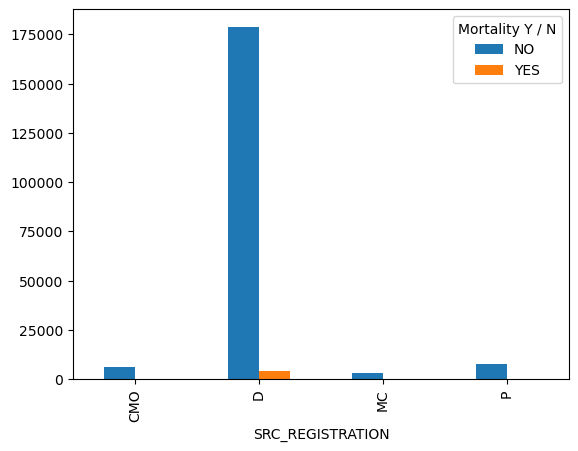

In [295]:
cat_col = ['SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
        'DISTRICT_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'Mortality Y / N',
       'SRC_REGISTRATION']
pd.crosstab(new_df.SRC_REGISTRATION,new_df["Mortality Y / N"]).plot(kind="bar")

## MISSING VALUES

In [16]:
#new_df.isnull().sum()

In [17]:
## lets deal with discharge date

In [18]:
new_df["CLAIM_DATE"] = new_df.CLAIM_DATE.str.split(" ",expand=True)[0]
new_df["PREAUTH_DATE"] = new_df.PREAUTH_DATE.str.split(" ",expand=True)[0]
new_df["DISCHARGE_DATE"] = new_df.DISCHARGE_DATE.str.split(" ",expand=True)[0]
new_df["SURGERY_DATE"] = new_df.SURGERY_DATE.str.split(" ",expand=True)[0]

In [19]:
new_df['CLAIM_DATE'] = pd.to_datetime(new_df['CLAIM_DATE'], format='%d-%m-%Y')
new_df['PREAUTH_DATE'] = pd.to_datetime(new_df['PREAUTH_DATE'], format='%d-%m-%Y')
new_df['SURGERY_DATE'] = pd.to_datetime(new_df['SURGERY_DATE'], format='%d-%m-%Y')

In [21]:
new_df.loc[new_df["DISCHARGE_DATE"]=="30/04/0116"]

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
20452,44,Male,ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ratnapuram,Chintur,East Godavari,2016-01-27,12500,2017-01-04,12500,District Hospital-Khammam-,G,Khammam,2016-01-27,30/04/0116,YES,30-04-2016 00:00,D


In [22]:
new_df.drop(index= 20452,inplace=True)

In [23]:
new_df['DISCHARGE_DATE'] = pd.to_datetime(new_df['DISCHARGE_DATE'], format='%d-%m-%Y')

In [24]:
new_df['Disch_after_surgery']=new_df['DISCHARGE_DATE']-new_df['SURGERY_DATE']

In [25]:
new_df['Disch_after_surgery']=new_df['Disch_after_surgery'].dt.days

In [26]:
new_df['Disch_after_surgery'].mean()

9.525844092237936

In [27]:
from datetime import datetime, timedelta

In [28]:
new_df.drop("MORTALITY_DATE",axis=1,inplace=True)

In [29]:
#.loc[new_df['DISCHARGE_DATE'].isnull(),['DISCHARGE_DATE']]=new_df['SURGERY_DATE'] + timedelta(days=9)

In [30]:
#new_df.loc[new_df['DISCHARGE_DATE'].isnull(),['DISCHARGE_DATE']]

In [31]:
new_df=new_df.loc[~(new_df['DISCHARGE_DATE'].isnull())]

In [32]:
new_df.isnull().sum()

AGE                    0
SEX                    0
CASTE_NAME             0
CATEGORY_CODE          0
CATEGORY_NAME          0
SURGERY_CODE           0
SURGERY                0
VILLAGE                0
MANDAL_NAME            0
DISTRICT_NAME          0
PREAUTH_DATE           0
PREAUTH_AMT            0
CLAIM_DATE             0
CLAIM_AMOUNT           0
HOSP_NAME              0
HOSP_TYPE              0
HOSP_DISTRICT          0
SURGERY_DATE           0
DISCHARGE_DATE         0
Mortality Y / N        0
SRC_REGISTRATION       0
Disch_after_surgery    0
dtype: int64

## OUTLIER TREATMENT

In [33]:
# as we are dealing with an insurance data , we will not deal with them

In [34]:
new_df['DISCHARGE_DATE']

0        2016-10-27
1        2016-12-15
2        2017-05-16
3        2017-08-19
4        2016-10-19
            ...    
199995   2017-09-19
199996   2017-03-03
199997   2016-10-03
199998   2017-02-13
199999   2016-12-05
Name: DISCHARGE_DATE, Length: 198053, dtype: datetime64[ns]

## FEATURE ENGINEERING

In [35]:
## let us look at the category codes

In [36]:
new_df.CATEGORY_CODE.value_counts(normalize=True)

M6     0.155034
S12    0.147693
S15    0.137009
S7     0.092097
S9     0.083962
S1     0.051466
M4     0.045018
S13    0.040560
M5     0.038262
S5     0.033032
S3     0.030961
M7     0.027356
S2     0.025276
S10    0.022045
S11    0.021954
M8     0.009134
M12    0.008326
S8     0.008235
S4     0.007872
M1     0.004297
S14    0.003428
M2     0.002782
S6     0.002318
M11    0.001121
M10    0.000419
M9     0.000177
S16    0.000141
M3     0.000015
S17    0.000010
Name: CATEGORY_CODE, dtype: float64

In [37]:
a= pd.DataFrame(pd.crosstab(new_df.CATEGORY_CODE,new_df["Mortality Y / N"]))

In [38]:
a["Ratio"] = a["YES"]/(a["YES"]+a["NO"])

In [39]:
a["Ratio"].describe()

count    29.000000
mean      0.019789
std       0.030182
min       0.000000
25%       0.000000
50%       0.004807
75%       0.021332
max       0.117509
Name: Ratio, dtype: float64

In [40]:
a["F/N"] = np.where(a.Ratio>0.02,"Fatal","Non_Fatal")

In [41]:
a["F/N"].value_counts()

Non_Fatal    21
Fatal         8
Name: F/N, dtype: int64

In [42]:
a.loc[a["F/N"]=="Fatal"]

Mortality Y / N,NO,YES,Ratio,F/N
CATEGORY_CODE,,,,
M1,751,100,0.117509,Fatal
M2,524,27,0.049002,Fatal
M5,7401,177,0.023357,Fatal
M6,30050,655,0.021332,Fatal
M7,5133,285,0.052602,Fatal
M8,1674,135,0.074627,Fatal
S10,4228,138,0.031608,Fatal
S14,615,64,0.094256,Fatal


In [43]:
def sur_cat(x):
    if x in ['M1','M10','M12','M2','M3','M4','M5','M6','M7','M8','S10','S14','S7','S8']:
        return("FATAL")
    else:
        return("NON_FATAL")

In [44]:
new_df["FAT/NON_FAT"] = new_df["CATEGORY_CODE"].apply(sur_cat)

<AxesSubplot:xlabel='FAT/NON_FAT'>

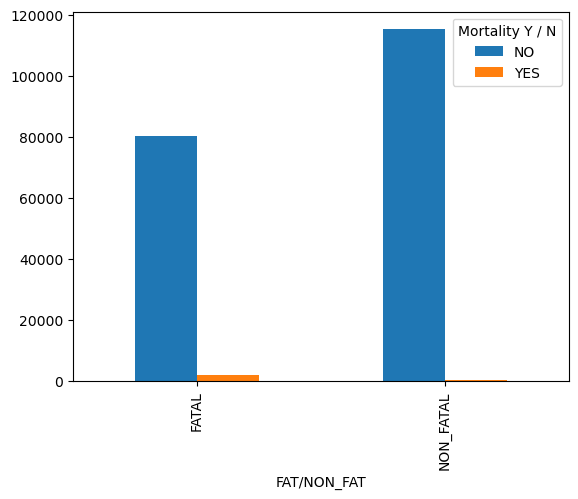

In [45]:
pd.crosstab(new_df["FAT/NON_FAT"],new_df["Mortality Y / N"]).plot(kind="bar")

In [46]:
## we can also look at which data is of surgery and which is of non surgery from category codes

In [47]:
def surgery(x):
    if x[0]=="S":
        return "Surgery"
    else:
        return "Not Surgery"

In [48]:
new_df["S/NS"] = new_df["CATEGORY_CODE"].apply(surgery)

<AxesSubplot:xlabel='S/NS'>

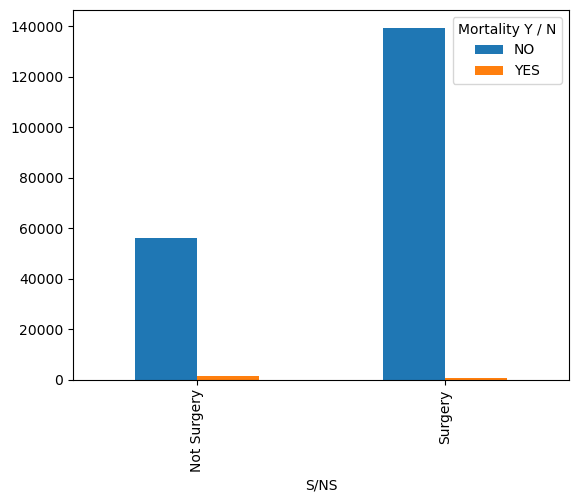

In [49]:
pd.crosstab(new_df["S/NS"],new_df["Mortality Y / N"]).plot(kind="bar")

In [50]:
## lets look at category namess
new_df["CATEGORY_NAME"].value_counts(normalize = True)

NEPHROLOGY                             0.155034
MEDICAL ONCOLOGY                       0.147693
POLY TRAUMA                            0.137009
CARDIAC AND CARDIOTHORACIC SURGERY     0.092097
GENITO URINARY SURGERIES               0.083962
GENERAL SURGERY                        0.051466
PEDIATRICS                             0.045018
RADIATION ONCOLOGY                     0.040560
CARDIOLOGY                             0.038262
ORTHOPEDIC  SURGERY AND PROCEDURES     0.033032
OPHTHALMOLOGY  SURGERY                 0.030961
NEUROLOGY                              0.027356
ENT  SURGERY                           0.025276
NEUROSURGERY                           0.022045
SURGICAL ONCOLOGY                      0.021954
PULMONOLOGY                            0.009134
GASTROENTEROLOGY                       0.008326
PEDIATRIC SURGERIES                    0.008235
GYNAECOLOGY AND OBSTETRICS  SURGERY    0.007872
CRITICAL CARE                          0.004297
PLASTIC SURGERY                        0

In [51]:
def bodypart(x):
    if x in ['CARDIAC AND CARDIOTHORACIC SURGERY','CARDIOLOGY']:
        return("Heart")
    
    elif x in ['GASTROENTEROLOGY','SURGICAL GASTRO ENTEROLOGY']:
        return("Stomach")
    
    elif x in ['NEUROLOGY','NEUROSURGERY']:
        return("Brain")
    
    elif x in ["OPHTHALMOLOGY  SURGERY ","ENT  SURGERY","PLASTIC SURGERY","DERMATOLOGY","COCHLEAR IMPLANT SURGERY"]:
        return("Eye/ear/skin/nose")
    
    elif x in ["NEPHROLOGY","GYNAECOLOGY AND OBSTETRICS  SURGER"]:
        return("urinary sysytem")
    
    elif x in ["MEDICAL ONCOLOGY","RADIATION ONCOLOGY","GENITO URINARY SURGERIES","SURGICAL ONCOLOGY"]:
        return("cancer")
    
    elif x in ["POLY TRAUMA","ORTHOPEDIC  SURGERY AND PROCEDURES"]:
        return("Organ/Bones")
    
    elif x in ["PULMONOLOGY"]:
        return("lungs")
    
    else:
        return("Other")

In [52]:
new_df["Body_parts"] = new_df["CATEGORY_NAME"].apply(bodypart)

<AxesSubplot:xlabel='Body_parts'>

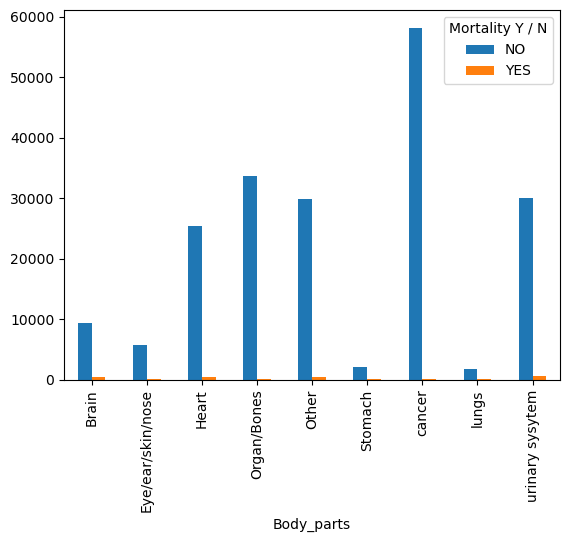

In [53]:
pd.crosstab(new_df["Body_parts"],new_df["Mortality Y / N"]).plot(kind='bar')

In [54]:
## we should now use the area data

def pronearea(x):
    if x in ["Nellore","Guntur"]:
        return("Disease_Prone_Area")
    elif x in ["Vizianagaram","Vishakhapatnam","Kurnool","Krishna"]:
        return("Mid_prone_area")
    else:
        return("Disease_Non_prone_area")
        

In [55]:
new_df["Area_prone"] = new_df["DISTRICT_NAME"].map(pronearea)

<AxesSubplot:xlabel='Area_prone'>

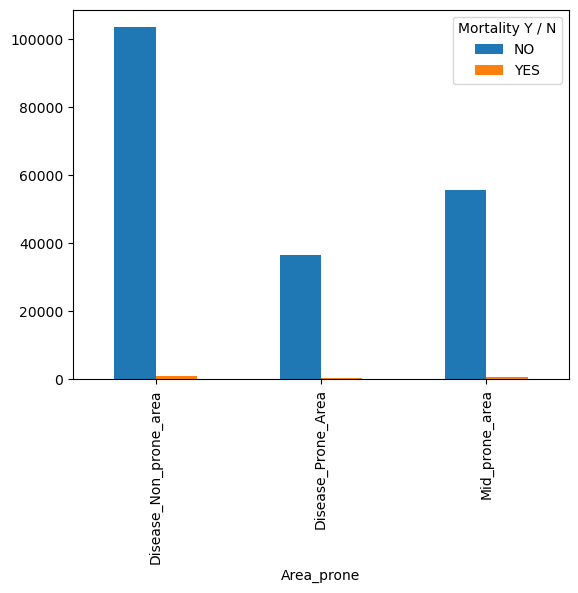

In [56]:
pd.crosstab(new_df["Area_prone"],new_df["Mortality Y / N"]).plot(kind='bar')

In [57]:
new_df['Claim_after_surgery']=new_df['CLAIM_DATE']-new_df['SURGERY_DATE']

In [58]:
new_df['Claim_after_PreAuth']=new_df['CLAIM_DATE']-new_df['PREAUTH_DATE']

In [59]:
new_df['Surgery_time']=new_df['SURGERY_DATE']-new_df['PREAUTH_DATE']

In [60]:
new_df['DISCHARGE_DATE']=new_df['DISCHARGE_DATE'].astype('str')

In [61]:
new_df["DISCHARGE_DATE"] = new_df.DISCHARGE_DATE.str.split(" ",expand=True)[0]

In [62]:
new_df['DISCHARGE_DATE'] = pd.to_datetime(new_df['DISCHARGE_DATE'], format='%Y-%m-%d')

In [63]:
new_df.loc[new_df['DISCHARGE_DATE']=='1500940800000000000']=2017-1-1

In [64]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time
0,55,Female,BC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134 days 00:00:00,142 days 00:00:00,8 days 00:00:00
1,66,Female,BC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56 days 00:00:00,57 days 00:00:00,1 days 00:00:00
2,50,Male,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28 days 00:00:00,29 days 00:00:00,1 days 00:00:00
3,2,Female(Child),BC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41 days 00:00:00,39 days 00:00:00,-2 days +00:00:00
4,44,Female,OC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85 days 00:00:00,87 days 00:00:00,2 days 00:00:00


In [65]:
new_df['Admit_time']=new_df['DISCHARGE_DATE']-new_df['PREAUTH_DATE']

In [66]:
new_df['Admit_time']=new_df['Admit_time'].dt.days

In [67]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,55,Female,BC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134 days 00:00:00,142 days 00:00:00,8 days 00:00:00,46
1,66,Female,BC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56 days 00:00:00,57 days 00:00:00,1 days 00:00:00,2
2,50,Male,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28 days 00:00:00,29 days 00:00:00,1 days 00:00:00,7
3,2,Female(Child),BC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41 days 00:00:00,39 days 00:00:00,-2 days +00:00:00,1
4,44,Female,OC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85 days 00:00:00,87 days 00:00:00,2 days 00:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,Male,SC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Sakinetipalle,Sakhinetipalli,East Godavari,2017-07-03 00:00:00,12500,2017-10-17 00:00:00,12500,Varma Hospitals,C,West Godavari,2017-07-05 00:00:00,2017-09-19 00:00:00,NO,D,76.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,104 days 00:00:00,106 days 00:00:00,2 days 00:00:00,78
199996,48,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Piler,Piler,Chittoor,2017-02-10 00:00:00,12500,2017-03-25 00:00:00,12500,S.V.R.R.Hospital,G,Chittoor,2017-02-10 00:00:00,2017-03-03 00:00:00,NO,D,21.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,43 days 00:00:00,43 days 00:00:00,0 days 00:00:00,21
199997,54,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Vetlapalem,Samalkota,East Godavari,2016-09-21 00:00:00,30000,2017-01-10 00:00:00,25000,SURYA GLOBAL MULTI SPECIALITY HOSPITALS AND CA...,C,East Godavari,2016-09-17 00:00:00,2016-10-03 00:00:00,NO,D,16.0,FATAL,Not Surgery,Heart,Disease_Non_prone_area,115 days 00:00:00,111 days 00:00:00,-4 days +00:00:00,12
199998,80,Male,BC,S1,GENERAL SURGERY,S1.3.4.2,Surgical treatment for Acute Intestinal obstru...,Gundubadu,Rolugunta,Vishakhapatnam,2017-02-13 00:00:00,48000,2017-09-25 00:00:00,40200,King George Hospital,G,Vishakhapatnam,2017-01-30 00:00:00,2017-02-13 00:00:00,NO,D,14.0,NON_FATAL,Surgery,Other,Mid_prone_area,238 days 00:00:00,224 days 00:00:00,-14 days +00:00:00,0


<AxesSubplot:xlabel='Mortality Y / N', ylabel='Admit_time'>

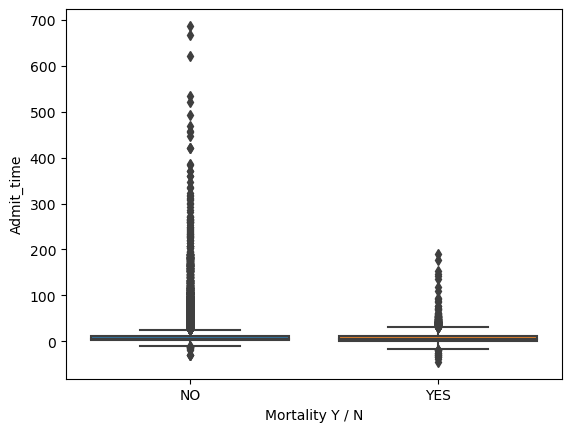

In [68]:
sns.boxplot(new_df['Mortality Y / N'],new_df['Admit_time'])

In [69]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,55,Female,BC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134 days 00:00:00,142 days 00:00:00,8 days 00:00:00,46
1,66,Female,BC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56 days 00:00:00,57 days 00:00:00,1 days 00:00:00,2
2,50,Male,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28 days 00:00:00,29 days 00:00:00,1 days 00:00:00,7
3,2,Female(Child),BC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41 days 00:00:00,39 days 00:00:00,-2 days +00:00:00,1
4,44,Female,OC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85 days 00:00:00,87 days 00:00:00,2 days 00:00:00,4


In [70]:
lis = ['Claim_after_surgery','Claim_after_PreAuth','Claim_after_PreAuth']

In [71]:
new_df["Claim_after_surgery"]=new_df["Claim_after_surgery"].astype("string")

In [72]:
new_df["Claim_after_surgery"] = new_df.Claim_after_surgery.str.split(" ",expand=True)[0]

In [73]:
new_df["Claim_after_PreAuth"]=new_df["Claim_after_PreAuth"].astype("string")
new_df["Claim_after_PreAuth"] = new_df.Claim_after_PreAuth.str.split(" ",expand=True)[0]

new_df["Surgery_time"]=new_df["Surgery_time"].astype("string")
new_df["Surgery_time"] = new_df.Surgery_time.str.split(" ",expand=True)[0]

In [74]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time
0,55,Female,BC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46
1,66,Female,BC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2
2,50,Male,BC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7
3,2,Female(Child),BC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1
4,44,Female,OC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4


In [75]:
#sns.boxplot(new_df["Mortality Y / N"],new_df["Claim_after_surgery"])

In [76]:
dic = new_df.HOSP_NAME.value_counts().to_dict()

In [77]:
new_df["Frequency_of_visit"]=new_df.HOSP_NAME.map(dic)

In [78]:
def merafunction(x):
    if 3500<x<6800:
        return("Most Highly Visited")
    elif 1500<x<3500:
        return("Highly Visited")
    elif 500<x<1500:
        return("Moderately Visited")
    else:
        return("Least Visited")

In [79]:
new_df["Type_as_visit"] = new_df["Frequency_of_visit"].apply(merafunction)

In [80]:
new_df.drop(columns= "Frequency_of_visit",axis=1,inplace=True)

<AxesSubplot:xlabel='Type_as_visit'>

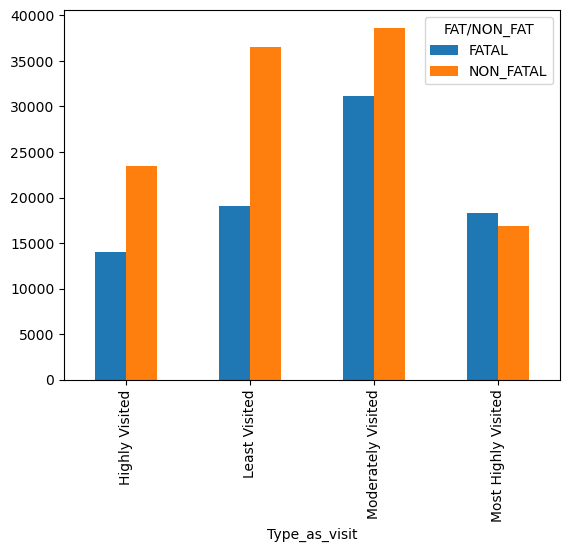

In [81]:
pd.crosstab(new_df["Type_as_visit"],new_df["FAT/NON_FAT"]).plot(kind='bar')

In [82]:
new_df["Change_of_district"]=np.where((new_df["DISTRICT_NAME"]==new_df["HOSP_DISTRICT"])&(new_df["FAT/NON_FAT"]=="FATAL"),0,1)

<AxesSubplot:xlabel='Change_of_district'>

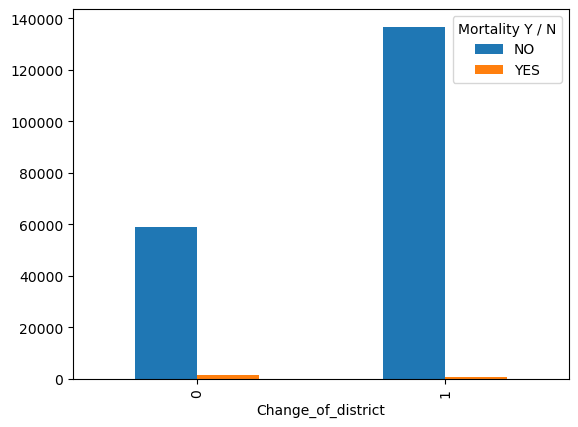

In [83]:
pd.crosstab(new_df["Change_of_district"],new_df["Mortality Y / N"]).plot(kind='bar')

In [84]:
new_df.loc[new_df["SEX"]=="FEMALE","SEX"] = "Female"
new_df.loc[new_df["SEX"]=="MALE","SEX"] = "Male"
new_df.loc[(new_df["SEX"]=="Male(Child)"),"SEX"] = "Male"
new_df.loc[(new_df["SEX"]=="Female(Child)"),"SEX"] = "Female"


<AxesSubplot:xlabel='SEX', ylabel='count'>

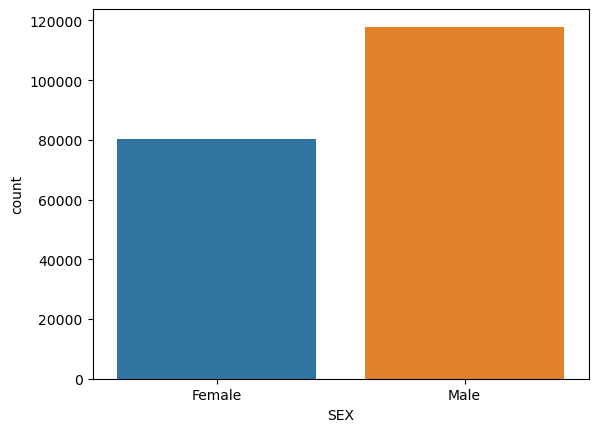

In [85]:
sns.countplot(new_df.SEX)

In [86]:
new_df.loc[(new_df["CASTE_NAME"]=="OC")|(new_df["CASTE_NAME"]=="BC"),"CASTE_NAME"] = "OBC"
new_df.loc[(new_df["CASTE_NAME"]=="SC")|(new_df["CASTE_NAME"]=="ST"),"CASTE_NAME"] = "SC/ST"

<AxesSubplot:xlabel='CASTE_NAME', ylabel='count'>

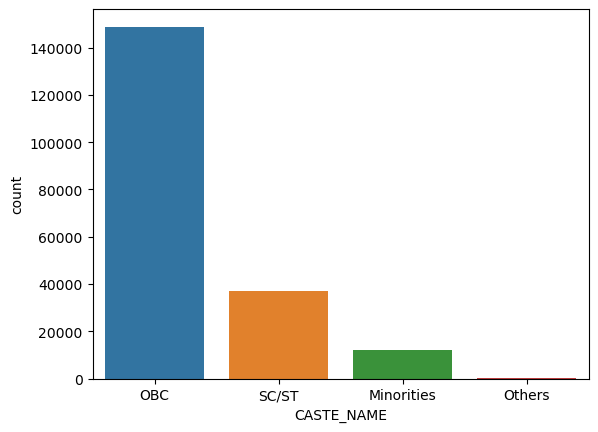

In [87]:
sns.countplot(new_df.CASTE_NAME)

In [88]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1


In [89]:
new_df.shape

(198053, 32)

In [90]:
new_df.corr()

,AGE,PREAUTH_AMT,CLAIM_AMOUNT,Disch_after_surgery,Admit_time,Change_of_district
AGE,1.000000,0.015548,0.035817,0.013576,0.044366,0.051612
PREAUTH_AMT,0.015548,1.000000,0.961833,-0.042800,-0.034042,-0.083801
CLAIM_AMOUNT,0.035817,0.961833,1.000000,-0.038374,-0.022996,-0.067737
Disch_after_surgery,0.013576,-0.042800,-0.038374,1.000000,0.939551,-0.297575
Admit_time,0.044366,-0.034042,-0.022996,0.939551,1.000000,-0.253351
Change_of_district,0.051612,-0.083801,-0.067737,-0.297575,-0.253351,1.000000


<AxesSubplot:xlabel='Mortality Y / N', ylabel='CLAIM_AMOUNT'>

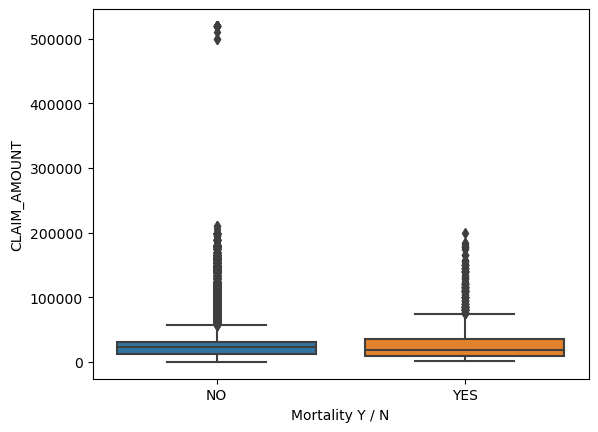

In [91]:
sns.boxplot(new_df["Mortality Y / N"],new_df["CLAIM_AMOUNT"])

In [92]:
new_df.head(5)

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1


In [93]:
from scipy.stats import chi2_contingency

In [94]:
a= pd.crosstab(new_df.Area_prone,new_df["Mortality Y / N"])

In [95]:
chi2_contingency(a)[1]

2.9529630226235914e-06

In [96]:
cat_col = ["SRC_REGISTRATION","FAT/NON_FAT","S/NS","Body_parts","Area_prone","Type_as_visit","Change_of_district","SEX","CASTE_NAME"]

In [97]:
for i in cat_col:
    tb = pd.crosstab(new_df.loc[:,i],new_df["Mortality Y / N"])
    pv =chi2_contingency(a)[1]
    print("Pvalue of ", i,"is ",pv)

Pvalue of  SRC_REGISTRATION is  2.9529630226235914e-06
Pvalue of  FAT/NON_FAT is  2.9529630226235914e-06
Pvalue of  S/NS is  2.9529630226235914e-06
Pvalue of  Body_parts is  2.9529630226235914e-06
Pvalue of  Area_prone is  2.9529630226235914e-06
Pvalue of  Type_as_visit is  2.9529630226235914e-06
Pvalue of  Change_of_district is  2.9529630226235914e-06
Pvalue of  SEX is  2.9529630226235914e-06
Pvalue of  CASTE_NAME is  2.9529630226235914e-06


In [98]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1


In [99]:
new_df.columns

Index(['AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE', 'Mortality Y / N', 'SRC_REGISTRATION',
       'Disch_after_surgery', 'FAT/NON_FAT', 'S/NS', 'Body_parts',
       'Area_prone', 'Claim_after_surgery', 'Claim_after_PreAuth',
       'Surgery_time', 'Admit_time', 'Type_as_visit', 'Change_of_district'],
      dtype='object')

In [100]:
mera_df = new_df.drop(columns=['CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE','HOSP_NAME','HOSP_NAME','HOSP_DISTRICT', 'SURGERY_DATE',
       'DISCHARGE_DATE'],axis=1)

In [101]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,66300,C,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,2000,C,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,11500,C,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,15000,C,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,41006,C,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,Male,SC/ST,12500,C,NO,D,76.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,104,106,2,78,Moderately Visited,1
199996,48,Female,OBC,12500,G,NO,D,21.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,43,43,0,21,Highly Visited,0
199997,54,Male,OBC,25000,C,NO,D,16.0,FATAL,Not Surgery,Heart,Disease_Non_prone_area,115,111,-4,12,Highly Visited,0
199998,80,Male,OBC,40200,G,NO,D,14.0,NON_FATAL,Surgery,Other,Mid_prone_area,238,224,-14,0,Most Highly Visited,1


In [102]:
# Encoding

In [103]:
mera_df["S/NS"].value_counts()

Surgery        140233
Not Surgery     57820
Name: S/NS, dtype: int64

In [104]:
mera_df.SEX = np.where(mera_df.SEX=="Male",1,0)

In [105]:
mera_df.HOSP_TYPE= np.where(mera_df.HOSP_TYPE=="C",1,0)

In [106]:
mera_df["Mortality Y / N"] = np.where(mera_df["Mortality Y / N"]=="NO",1,0)

In [107]:
mera_df["FAT/NON_FAT"] = np.where(mera_df["FAT/NON_FAT"]=="NON_FATAL",1,0)

In [108]:
mera_df["S/NS"] = np.where(mera_df["S/NS"]=="Surgery",1,0)

In [150]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,0,0.751284,66300,1,1,0.913493,38.0,1,1,0.294169,0.284914,134.0,142.0,8.0,46,0.188884,1
1,66,0,0.751284,2000,1,1,0.913493,1.0,1,1,0.294169,0.528318,56.0,57.0,1.0,2,0.188884,1
2,50,1,0.751284,11500,1,1,0.913493,6.0,1,1,0.170040,0.284914,28.0,29.0,1.0,7,0.352209,1
3,2,0,0.751284,15000,1,1,0.913493,3.0,0,0,0.152197,0.284914,41.0,39.0,-2.0,1,0.352209,0
4,44,0,0.751284,41006,1,1,0.913493,2.0,1,1,0.294169,0.528318,85.0,87.0,2.0,4,0.188884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,1,0.187066,12500,1,1,0.913493,76.0,0,0,0.155034,0.528318,104.0,106.0,2.0,78,0.352209,1
199996,48,0,0.751284,12500,0,1,0.913493,21.0,0,0,0.155034,0.528318,43.0,43.0,0.0,21,0.188884,0
199997,54,1,0.751284,25000,1,1,0.913493,16.0,0,0,0.130359,0.528318,115.0,111.0,-4.0,12,0.188884,0
199998,80,1,0.751284,40200,0,1,0.913493,14.0,1,1,0.152197,0.284914,238.0,224.0,-14.0,0,0.178149,1


In [110]:
fc= ["CASTE_NAME","SRC_REGISTRATION","Body_parts","Area_prone","Type_as_visit"]
for i in fc:
    d = mera_df[i].value_counts(normalize=True).to_dict()
    mera_df[i]= mera_df[i].map(d)

In [111]:
mera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198053 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGE                  198053 non-null  int64  
 1   SEX                  198053 non-null  int32  
 2   CASTE_NAME           198053 non-null  float64
 3   CLAIM_AMOUNT         198053 non-null  int64  
 4   HOSP_TYPE            198053 non-null  int32  
 5   Mortality Y / N      198053 non-null  int32  
 6   SRC_REGISTRATION     198053 non-null  float64
 7   Disch_after_surgery  198053 non-null  float64
 8   FAT/NON_FAT          198053 non-null  int32  
 9   S/NS                 198053 non-null  int32  
 10  Body_parts           198053 non-null  float64
 11  Area_prone           198053 non-null  float64
 12  Claim_after_surgery  198053 non-null  string 
 13  Claim_after_PreAuth  198053 non-null  string 
 14  Surgery_time         198053 non-null  string 
 15  Admit_time       

In [112]:
# Changing D Type
dt = ["Claim_after_surgery","Claim_after_PreAuth","Surgery_time"]

In [113]:
for i in dt:
    mera_df[i] = mera_df[i].astype("float")

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x= mera_df.drop("Mortality Y / N",axis=1)
y = mera_df["Mortality Y / N"]

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80)

In [249]:
from imblearn.over_sampling import SMOTE
sm= SMOTE()
x_train_s ,y_train_s =sm.fit_resample(x_train,y_train)

In [250]:
mera_df

,AGE,SEX,CASTE_NAME,CLAIM_AMOUNT,HOSP_TYPE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,0,0.751284,66300,1,1,0.913493,38.0,1,1,0.294169,0.284914,134.0,142.0,8.0,46,0.188884,1
1,66,0,0.751284,2000,1,1,0.913493,1.0,1,1,0.294169,0.528318,56.0,57.0,1.0,2,0.188884,1
2,50,1,0.751284,11500,1,1,0.913493,6.0,1,1,0.170040,0.284914,28.0,29.0,1.0,7,0.352209,1
3,2,0,0.751284,15000,1,1,0.913493,3.0,0,0,0.152197,0.284914,41.0,39.0,-2.0,1,0.352209,0
4,44,0,0.751284,41006,1,1,0.913493,2.0,1,1,0.294169,0.528318,85.0,87.0,2.0,4,0.188884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,1,0.187066,12500,1,1,0.913493,76.0,0,0,0.155034,0.528318,104.0,106.0,2.0,78,0.352209,1
199996,48,0,0.751284,12500,0,1,0.913493,21.0,0,0,0.155034,0.528318,43.0,43.0,0.0,21,0.188884,0
199997,54,1,0.751284,25000,1,1,0.913493,16.0,0,0,0.130359,0.528318,115.0,111.0,-4.0,12,0.188884,0
199998,80,1,0.751284,40200,0,1,0.913493,14.0,1,1,0.152197,0.284914,238.0,224.0,-14.0,0,0.178149,1


In [251]:
# Fitting The models

In [252]:
import statsmodels.api as sma

In [253]:
x_train_c=sma.add_constant(x_train_s)
t_test_c=sma.add_constant(x_test)

In [254]:
base_model=sma.Logit(y_train_s,x_train_c).fit()

         Current function value: 0.295133
         Iterations: 35


C:\Users\bhavv\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [255]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Mortality Y / N   No. Observations:               313252
Model:                          Logit   Df Residuals:                   313234
Method:                           MLE   Df Model:                           17
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5742
Time:                        16:02:47   Log-Likelihood:                -92451.
converged:                      False   LL-Null:                   -2.1713e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2943      0.045      6.481      0.000       0.205       0.383
AGE                    -0.0251      0.000    -78.640      0.000      -0.026      -0.024
SEX                     1.0160      0.012     83.356      0.000       0.992       1.040
CASTE_NAME             -0.2283      0.025     -9.031      0.000      -0.278      -0.179
CLAIM_AMOUNT         4.408e-06   2.97e-07     14.857      0.000    3.83e-06    4.99e-06
HOSP_TYPE               1.3287      0.014     97.954      0.000       1.302       1.355
SRC_REGISTRATION        0.0125      0.024      0.513      0.608      -0.035       0.060
Disch_after_surgery    -2.5977      0.018   -144.513      0.000      -2.633      -2.562
FAT/NON_FAT             2.9394      0.033     90.237      0.000       2.876       3.003
S/NS                    0.7774      0.021     36.767      0.000       0.736       0.819
Body_parts             -2.7770      0.127    -21.913      0.000      -3.025      -2.529
Area_prone              0.0704      0.047      1.491      0.136      -0.022       0.163
Claim_after_surgery     0.8742   1195.814      0.001      0.999   -2342.878    2344.626
Claim_after_PreAuth    -0.8833   1195.814     -0.001      0.999   -2344.635    2342.868
Surgery_time           -1.6762   1195.814     -0.001      0.999   -2345.428    2342.076
Admit_time              2.6678      0.018    146.998      0.000       2.632       2.703
Type_as_visit          -1.8511      0.092    -20.045      0.000      -2.032      -1.670
Change_of_district      0.9773      0.017     57.450      0.000       0.944       1.011
=======================================================================================
"""

In [256]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [257]:
y_pred_base = base_model.predict(t_test_c)

In [258]:
y_pred_base1 = np.where(y_pred_base>0.5,1,0)

In [259]:
print(classification_report(y_test,y_pred_base1))

              precision    recall  f1-score   support

           0       0.05      0.65      0.10       464
           1       1.00      0.86      0.92     39147

    accuracy                           0.86     39611
   macro avg       0.52      0.76      0.51     39611
weighted avg       0.98      0.86      0.91     39611



In [260]:
print(confusion_matrix(y_test,y_pred_base1))

[[  301   163]
 [ 5346 33801]]


In [261]:
accuracy_score(y_test,y_pred_base1)

0.8609224710307742

In [241]:
from sklearn.tree import DecisionTreeClassifier

In [242]:
dt = DecisionTreeClassifier(max_depth=3)

In [243]:
model_dt = dt.fit(x_train_s,y_train_s)

In [244]:
y_pred_dt = model_dt.predict(x_test)

In [245]:
from sklearn.metrics import f1_score,accuracy_score,precision_score

In [262]:
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print("accuracy_score of decision tree :",accuracy_score(y_test,y_pred_dt))
#print("precision_score",precision_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.05      0.56      0.09       464
           1       0.99      0.88      0.93     39147

    accuracy                           0.87     39611
   macro avg       0.52      0.72      0.51     39611
weighted avg       0.98      0.87      0.92     39611

[[  261   203]
 [ 4837 34310]]
accuracy_score of decision tree : 0.8727626164449269


In [263]:
f1_score(y_test,y_pred_dt)

0.9315775183274504

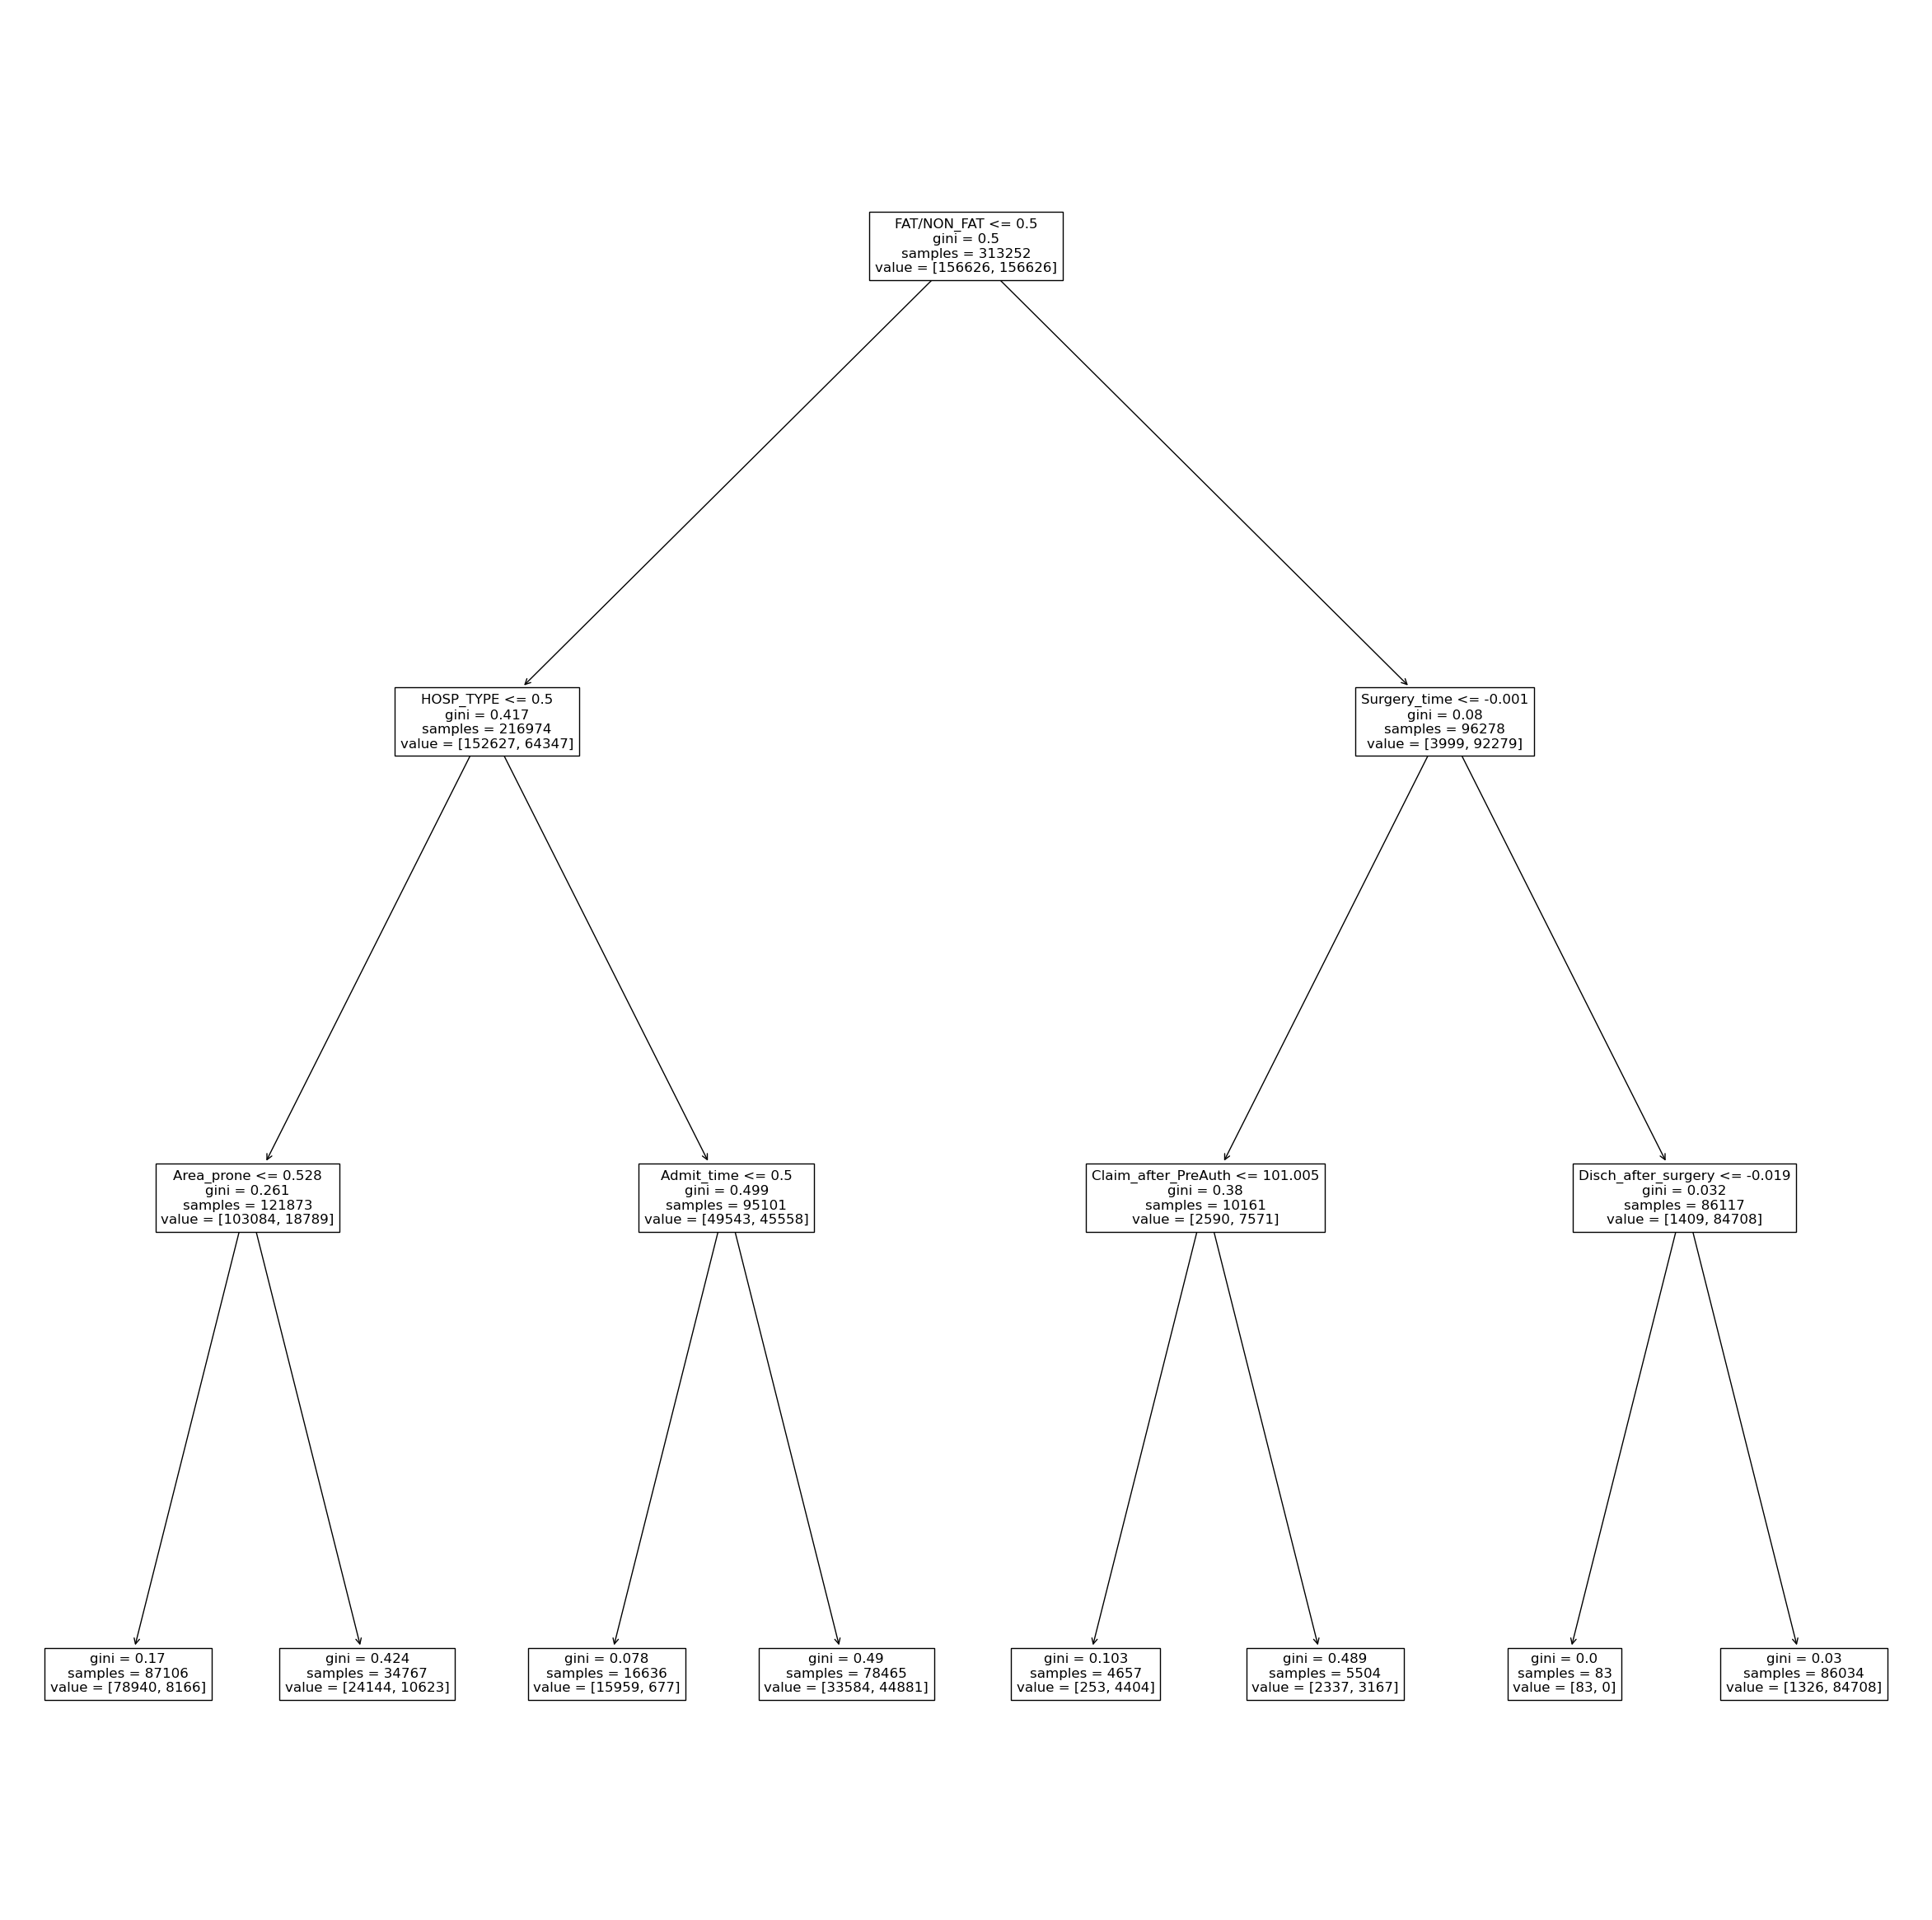

In [264]:
from sklearn.tree import plot_tree
plt.figure(figsize=[30,30])
plot_tree(dt,feature_names=x.columns)
plt.show()

In [265]:
from sklearn.naive_bayes import GaussianNB
dt=GaussianNB()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of naive beyes",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of naive beyes 0.823811567493878
              precision    recall  f1-score   support

           0       0.04      0.67      0.08       464
           1       1.00      0.83      0.90     39147

    accuracy                           0.82     39611
   macro avg       0.52      0.75      0.49     39611
weighted avg       0.98      0.82      0.89     39611



In [266]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier(n_estimators=3,max_depth=3)
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of random forest",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of random forest 0.7893261972684356
              precision    recall  f1-score   support

           0       0.04      0.76      0.08       464
           1       1.00      0.79      0.88     39147

    accuracy                           0.79     39611
   macro avg       0.52      0.77      0.48     39611
weighted avg       0.99      0.79      0.87     39611



In [238]:
from sklearn.ensemble import AdaBoostClassifier
dt=AdaBoostClassifier()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of ADABOOST",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of ADABOOST 0.9617530483956477
              precision    recall  f1-score   support

           0       0.15      0.49      0.23       464
           1       0.99      0.97      0.98     39147

    accuracy                           0.96     39611
   macro avg       0.57      0.73      0.61     39611
weighted avg       0.98      0.96      0.97     39611



In [239]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
model_dt = dt.fit(x_train_s,y_train_s)
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of Gradient:",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of Gradient: 0.9798793264497235
              precision    recall  f1-score   support

           0       0.28      0.46      0.35       464
           1       0.99      0.99      0.99     39147

    accuracy                           0.98     39611
   macro avg       0.64      0.72      0.67     39611
weighted avg       0.99      0.98      0.98     39611



In [240]:
from xgboost import XGBClassifier
dt=XGBClassifier()
y_pred_dt = model_dt.predict(x_test)
print("accuracy_score of XGBoosting",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

accuracy_score of XGBoosting 0.9798793264497235
              precision    recall  f1-score   support

           0       0.28      0.46      0.35       464
           1       0.99      0.99      0.99     39147

    accuracy                           0.98     39611
   macro avg       0.64      0.72      0.67     39611
weighted avg       0.99      0.98      0.98     39611



# boosting models are overfitting

In [214]:
new_df.head(1)

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1


In [126]:
from scipy.stats import chi2_contingency

In [127]:
from scipy.stats import f_oneway

In [128]:
a

Mortality Y / N,NO,YES
Area_prone,,
Disease_Non_prone_area,103547,1088
Disease_Prone_Area,36536,454
Mid_prone_area,55690,738


In [129]:
chi2_contingency(a)[1]

2.9529630226235914e-06

In [130]:
# Category vs Number
# SEX and AGE

In [131]:
sample_1 = new_df[new_df["SEX"]=="Male"]["AGE"]
sample_2 = new_df[new_df["SEX"]=="Female"]["AGE"]

In [132]:
from statsmodels.stats.weightstats import ztest as ztest

In [133]:
ztest(sample_1,sample_2)

(-23.83817460371421, 1.3431541558310477e-125)

In [134]:
# Category more than 2 annova

In [135]:
# Num vs Num : One way Annova

In [136]:
from statsmodels.formula.api import ols

In [137]:
model = ols("AGE~CLAIM_AMOUNT",data=new_df).fit()

In [138]:
from statsmodels.stats.anova import anova_lm

In [139]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
CLAIM_AMOUNT,1.0,9.120926e+04,91209.264294,254.403712,3.091379e-57
Residual,198051.0,7.100559e+07,358.521751,NaN,NaN


In [140]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,Male,SC/ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Sakinetipalle,Sakhinetipalli,East Godavari,2017-07-03 00:00:00,12500,2017-10-17 00:00:00,12500,Varma Hospitals,C,West Godavari,2017-07-05 00:00:00,2017-09-19 00:00:00,NO,D,76.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,104,106,2,78,Moderately Visited,1
199996,48,Female,OBC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Piler,Piler,Chittoor,2017-02-10 00:00:00,12500,2017-03-25 00:00:00,12500,S.V.R.R.Hospital,G,Chittoor,2017-02-10 00:00:00,2017-03-03 00:00:00,NO,D,21.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,43,43,0,21,Highly Visited,0
199997,54,Male,OBC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Vetlapalem,Samalkota,East Godavari,2016-09-21 00:00:00,30000,2017-01-10 00:00:00,25000,SURYA GLOBAL MULTI SPECIALITY HOSPITALS AND CA...,C,East Godavari,2016-09-17 00:00:00,2016-10-03 00:00:00,NO,D,16.0,FATAL,Not Surgery,Heart,Disease_Non_prone_area,115,111,-4,12,Highly Visited,0
199998,80,Male,OBC,S1,GENERAL SURGERY,S1.3.4.2,Surgical treatment for Acute Intestinal obstru...,Gundubadu,Rolugunta,Vishakhapatnam,2017-02-13 00:00:00,48000,2017-09-25 00:00:00,40200,King George Hospital,G,Vishakhapatnam,2017-01-30 00:00:00,2017-02-13 00:00:00,NO,D,14.0,NON_FATAL,Surgery,Other,Mid_prone_area,238,224,-14,0,Most Highly Visited,1


In [141]:
a = pd.crosstab(new_df["DISTRICT_NAME"],new_df["HOSP_TYPE"])

In [142]:
a["C/G"] = a["G"]/a["C"]

In [143]:
a

HOSP_TYPE,C,G,C/G
DISTRICT_NAME,,,
Anantapur,9232,2767,0.299718
Chittoor,7170,7893,1.100837
East Godavari,18178,4881,0.268511
Guntur,16355,4422,0.270376
Krishna,15429,2103,0.136302
Kurnool,8928,4279,0.479279
Nellore,14715,1498,0.101801
Prakasam,12232,2019,0.165059
Srikakulam,8870,2323,0.261894


In [144]:
new_df

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,Male,SC/ST,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Sakinetipalle,Sakhinetipalli,East Godavari,2017-07-03 00:00:00,12500,2017-10-17 00:00:00,12500,Varma Hospitals,C,West Godavari,2017-07-05 00:00:00,2017-09-19 00:00:00,NO,D,76.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,104,106,2,78,Moderately Visited,1
199996,48,Female,OBC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Piler,Piler,Chittoor,2017-02-10 00:00:00,12500,2017-03-25 00:00:00,12500,S.V.R.R.Hospital,G,Chittoor,2017-02-10 00:00:00,2017-03-03 00:00:00,NO,D,21.0,FATAL,Not Surgery,urinary sysytem,Disease_Non_prone_area,43,43,0,21,Highly Visited,0
199997,54,Male,OBC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Vetlapalem,Samalkota,East Godavari,2016-09-21 00:00:00,30000,2017-01-10 00:00:00,25000,SURYA GLOBAL MULTI SPECIALITY HOSPITALS AND CA...,C,East Godavari,2016-09-17 00:00:00,2016-10-03 00:00:00,NO,D,16.0,FATAL,Not Surgery,Heart,Disease_Non_prone_area,115,111,-4,12,Highly Visited,0
199998,80,Male,OBC,S1,GENERAL SURGERY,S1.3.4.2,Surgical treatment for Acute Intestinal obstru...,Gundubadu,Rolugunta,Vishakhapatnam,2017-02-13 00:00:00,48000,2017-09-25 00:00:00,40200,King George Hospital,G,Vishakhapatnam,2017-01-30 00:00:00,2017-02-13 00:00:00,NO,D,14.0,NON_FATAL,Surgery,Other,Mid_prone_area,238,224,-14,0,Most Highly Visited,1


In [145]:
new_df.HOSP_NAME.value_counts()[0:200]

Sri Venkateswara Institute Of Medical Sciences                                   9120
King George Hospital                                                             5525
BASAVATARAKAM INDO AMERICAN CANCER HOSPITAL and RESEARCH INSTITUTE, Hyderabad    5227
Government General Hospital, Guntur                                              5103
Government General Hospital,Kakinada                                             4293
                                                                                 ... 
Medicare Hospitals                                                                213
SUNSHINE HEART INSTITUTE                                                          213
ABC HOSPITALS                                                                     212
Anasuya Institute Of Medical Sciences                                             208
LOTUS HOSPITAL                                                                    207
Name: HOSP_NAME, Length: 200, dtype: int64

<AxesSubplot:xlabel='Body_parts'>

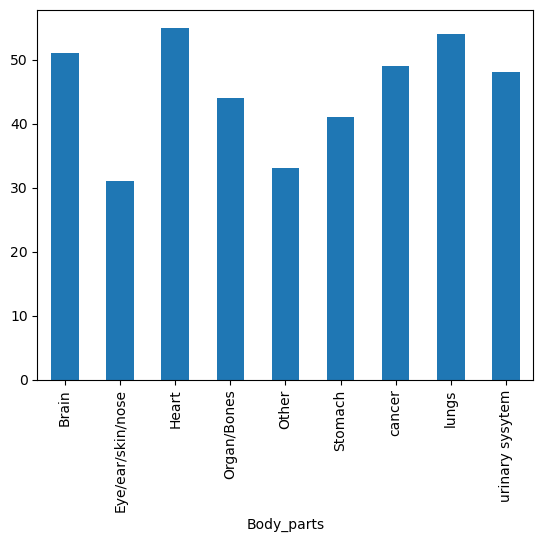

In [146]:
new_df.groupby("Body_parts")["AGE"].median().plot(kind="bar")

In [147]:
new_df.groupby("Body_parts")["SEX"].describe()

,count,unique,top,freq
Body_parts,,,,
Brain,9784,2,Male,5980
Eye/ear/skin/nose,5748,2,Female,3246
Heart,25818,2,Male,17775
Organ/Bones,33677,2,Male,22702
Other,30143,2,Male,17809
Stomach,2108,2,Male,1595
cancer,58261,2,Female,32388
lungs,1809,2,Male,1211
urinary sysytem,30705,2,Male,22464


<AxesSubplot:xlabel='Body_parts'>

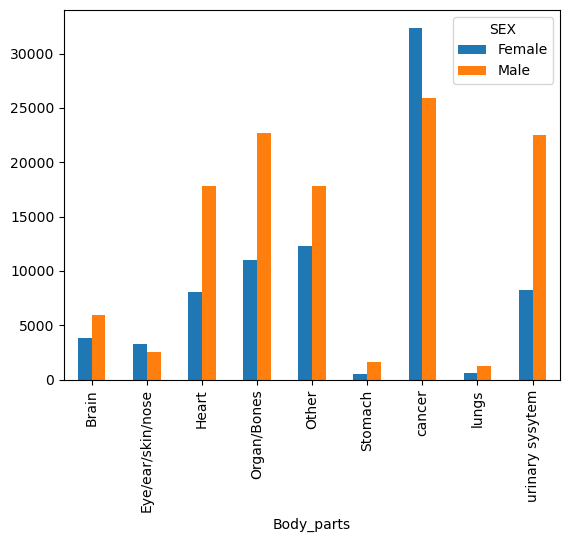

In [148]:
pd.crosstab(new_df['Body_parts'], new_df['SEX']).plot(kind="bar")

In [149]:
new_df.head()

,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION,Disch_after_surgery,FAT/NON_FAT,S/NS,Body_parts,Area_prone,Claim_after_surgery,Claim_after_PreAuth,Surgery_time,Admit_time,Type_as_visit,Change_of_district
0,55,Female,OBC,S13,RADIATION ONCOLOGY,S13.2.1,Radical Treatment With Photons External Beam R...,Gittupalle,Bondapalle,Vizianagaram,2016-09-11 00:00:00,66300,2017-01-31 00:00:00,66300,Ms Mahatma Gandhi Cancer Hospital and Research...,C,Vishakhapatnam,2016-09-19 00:00:00,2016-10-27 00:00:00,NO,D,38.0,NON_FATAL,Surgery,cancer,Mid_prone_area,134,142,8,46,Highly Visited,1
1,66,Female,OBC,S12,MEDICAL ONCOLOGY,S12.2.1,Chemotherapy for Cervical Cancer with Weekly C...,Kangundi,Kuppam,Chittoor,2016-12-13 00:00:00,2000,2017-02-08 00:00:00,2000,Ircs Cancer Hospital Indian Red Cross Society ...,C,Nellore,2016-12-14 00:00:00,2016-12-15 00:00:00,NO,D,1.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,56,57,1,2,Highly Visited,1
2,50,Male,OBC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Tadigadapa,Penamaluru,Krishna,2017-05-09 00:00:00,30000,2017-06-07 00:00:00,11500,GMR Varalakshmi CARE Hospital,C,Srikakulam,2017-05-10 00:00:00,2017-05-16 00:00:00,NO,D,6.0,NON_FATAL,Surgery,Organ/Bones,Mid_prone_area,28,29,1,7,Moderately Visited,1
3,2,Female,OBC,M4,PEDIATRICS,M4.2.1.3,Medical Management of Severe Bronchopneumon ia...,Pedabhogila,Seethanagaram,Vizianagaram,2017-08-18 00:00:00,15000,2017-09-26 00:00:00,15000,ANDHRA HOSPITALS,C,Vizianagaram,2017-08-16 00:00:00,2017-08-19 00:00:00,NO,D,3.0,FATAL,Not Surgery,Other,Mid_prone_area,41,39,-2,1,Moderately Visited,0
4,44,Female,OBC,S9,GENITO URINARY SURGERIES,S9.3.2,PCNL,Thanapalle,Tirupati(Rural),Chittoor,2016-10-15 00:00:00,41006,2017-01-10 00:00:00,41006,Russh Hospitals Pvt Ltd,C,Chittoor,2016-10-17 00:00:00,2016-10-19 00:00:00,NO,D,2.0,NON_FATAL,Surgery,cancer,Disease_Non_prone_area,85,87,2,4,Highly Visited,1
